## Final Project Submission

Please fill out:
* Student name: Susanna Han
* Student pace: part time 
* Scheduled project review date/time: 11/23/2019
* Instructor name: James Irving
* Blog post URL: https://medium.com/@susanna.jihae.han/blog-post-7f6e1ff7d833


# Introduction

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import*

fsds_1007219  v0.4.44 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(16,16)
plt.style.use('seaborn')
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
kc_df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns',0)

In [4]:
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
kc_df.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.00,21597.000
mean,4.580474e+09,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.62,12758.284
std,2.876736e+09,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.23,27274.442
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.00,651.000
25%,2.123049e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.00,5100.000
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.00,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.00,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.00,871200.000


In [7]:
for col in kc_df.columns:
    print(col,'\n',kc_df[col].value_counts(normalize=True).head(),'\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

From the data above we are able to break down the columns into different categories to help us clean the data for future visualization. After I break down the types of data and have a better idea of the information i'm working with. I will go through each column and clean the data by replacing and filling in Nan variables with the appropriate information as well as dropping unneccessary columns/rows. Then, with my clean dataset I will temporarily check each column and transform them to a z score value and delete rows that are defined as outliers. This will then be used for my first model. For my second model, I will fully transform my dataset into z score and create a model off of the transformed data and compare the two. 

## Types of Columns  
    
    DATE:                        
        - date                          
        - yr_built                      
        - yr_renovated                  
                               
    CATEGORICAL:
        - waterfront
        - view
        - condition
        - grade
        - zipcode

    FLOATS AND INTEGERS:
        - price (dependent variable)
        - bedrooms
        - bathrooms
        - sqft_living
        - sqft_lot
        - floors
        - sqft_above
        - sqft_basement
        - lat
        - long
        - sqft_living15
        - sqft_lot15
        
    OTHERS:
        - id


# SCRUBBING data

First, I dropped the 'id' column because it is simply a marker for each row which does not add any value. The 'yr_renovated' column also shows that there are more than 95% of the data missing. Therefore, seen as not useful. After the columns have been dropped I filled in all the null and placeholder variables found to complete the data.

In [8]:
kc_df.drop('id', axis=1, inplace = True) 

In [9]:
kc_df.drop('yr_renovated', axis=1, inplace = True) 

In [10]:
kc_df['date'] = pd.to_datetime(kc_df['date'])

In [11]:
print('null values in data:')
nulls = kc_df.isnull().sum()
print(nulls[nulls>0])

null values in data:
waterfront    2376
view            63
dtype: int64


In [12]:
nulls_percentage = nulls/len(kc_df)
print(nulls_percentage[nulls>0])
#percentage of null values 

waterfront    0.110015
view          0.002917
dtype: float64


In [13]:
kc_df['waterfront'].fillna(kc_df['waterfront'].median(), inplace=True)
#kc_df['waterfront'].value_counts()
kc_df['view'].fillna(kc_df['view'].median(), inplace=True)
#kc_df['view'].value_counts()

In [14]:
kc_df['sqft_basement'] = kc_df['sqft_basement'].replace('?',0.0)
#kc_df['sqft_basement'].unique()

### Cleaning the Look of the Data

Now that all the columns and data are filled in I then convert the following columns into an integer to make it easier to look at: view, waterfront, and sqft_basement.  

In [15]:
kc_df['view'] = kc_df['view'].astype(int) 
kc_df['waterfront'] = kc_df['waterfront'].astype(int) 

In [16]:
kc_df['sqft_basement'] = kc_df['sqft_basement'].astype(float) 
kc_df['sqft_basement'] = kc_df['sqft_basement'].astype(int) 

In [17]:
for col in kc_df.columns:
    print(col,'\n',kc_df[col].value_counts(normalize=True).head(),'\n\n')

date 
 2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    0.088438
3.0    0.028291
2.5    0.007455
Name: floors, dtype: float64 


waterfront 
 0    0.99324
1    0.00676
Name: waterfront, dtype: float6

In [18]:
kc_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Multicollinearity

To make sure the cleaned out data is of high quality we verify by running a couple of tests. The first test is to check the correlation between all columns to see the similarities and what columns may overlap. If the correlation between two columns is above 75%, one of two columns are no longer needed as the information given overlap and do not add value. After, we will check to see what outliers are in the dataset and use a function to go through each column.

In [19]:
def multiplot(corr):
    fig, ax = plt.subplots(figsize =(12,12))
    mask = np.zeros_like(np.abs(kc_df.corr().round(3)), dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True 
    sns.heatmap(np.abs(kc_df.corr().round(3)), mask=mask, annot = True, cmap ='Oranges', ax=ax)
    
    return fig, ax 

In [20]:
drop_cols = ['sqft_above','sqft_living']
kc_df.drop(drop_cols, axis=1, inplace=True)

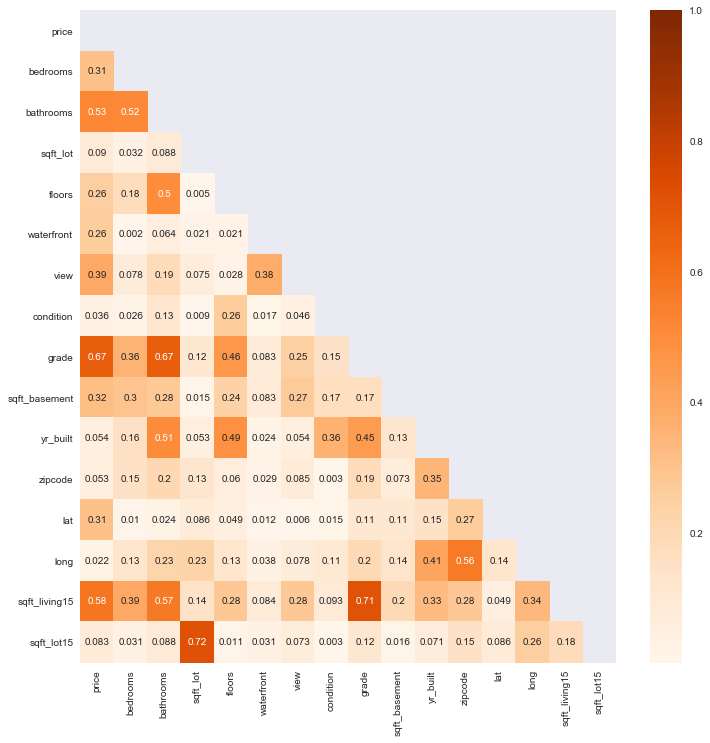

In [21]:
multiplot(np.abs(kc_df.corr()));

### QUESTION 1: What does the plot say about the data of each column?
The plot above shows the correlation between each column in a matrix format. Comparing every column with the percentage of correlation displayed. The correlation is then color coded with an orange color gradient displaying darker shades with larger percentages. This way we are able to spot high correlated columns efficiently. 

Columns 'sqft_above' and 'sqft_living' showed multiple percentages higher than .75 with different variables indicating that the correlation is too high. Therefore, dropping the column as they are no longer needed to add value to the model. This plot shows that there are less than 75% of correlation between all the listed variables.

# EXPLORING data

In [22]:
def check_column(kc_df, col_name, n_unique=10):
    """Displays info on null values, unique 
    values and displays .describe()
    
    Arg:
        kc_df(df): contains the columns
        col_name(str): name of the df column to show
        n_unique(int): number of unique values top show.
    Return:
        fig, ax(matplotlib Figure and Axes)
    """

    num_nulls = kc_df[col_name].isna().sum()
    print(f'Null Values Present={num_nulls}')
    
    print('Describe:')
    display(kc_df[col_name].describe().round(3))
    
    f = 'price~'+ col_name
    model = ols(formula=f, data=kc_df).fit()
    display(model.summary())
    
    fig, axes = plt.subplots(ncols=2, nrows=1,figsize=(10,6));
    sns.distplot(kc_df[col_name],hist=False,color="orange",kde_kws={"shade": True}, ax=axes[0])
    
    sns.regplot(x=col_name, y='price', data=kc_df, ax=axes[1], color='orange')
    plt.tight_layout();
    
    return model

Null Values Present=0
Describe:


count    21597.000
mean         3.373
std          0.926
min          1.000
25%          3.000
50%          3.000
75%          4.000
max         33.000
Name: bedrooms, dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:03:45   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

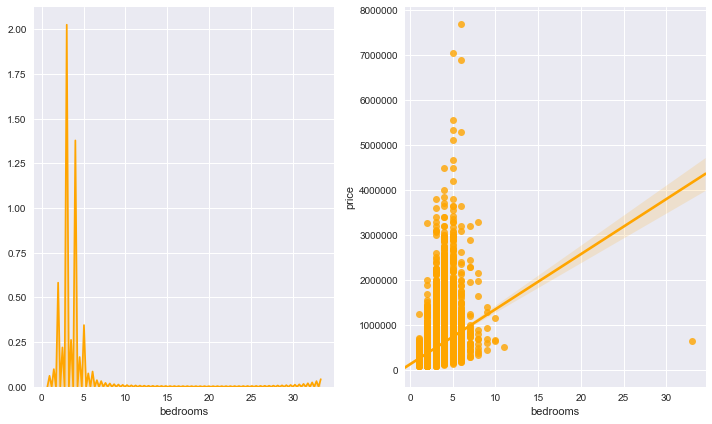

In [23]:
model=check_column(kc_df,'bedrooms')

Using the definition created above we are able to check all columns information separatly. Making it easier to view data distribution and linear regression between the independent and dependent variables. It will also show obvious outliers within the data as well as your r-squared value to help determine the progress of the data scrub. As you can see there is one obvious outlier within the dataset with 33 bedrooms.

In [24]:
model.params

Intercept    127199.512685
bedrooms     122464.444174
dtype: float64

### QUESTION 2: What does the model check for column 'bedrooms' say about our data?
We are able to gather basic and helpful information above with each individual column and their relationship with the dependent variable 'price'. In the column bedrooms we are able to see the positive coefficient indicating a positive correlation. This then can be interpreted as with every bedroom added to a home the price is increased by the coefficient 1.272e+05 ($122,464.44). Another great visual that gives us information is the distribution of the column data in a displot graph. As there is a long tail on the right side we know there are outliers within the dataset.

#### Finding Outliers

In [25]:
def find_outliers(col):
    """Use scipy to calcualte absoliute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series): a series/column from your DataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
    Ex:
    >> idx_outs = find_outliers(df['bedrooms'])
    >> df_clean = df.loc[idx_outs==False]"""
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)


In [26]:
print(kc_df.shape)
idx_outs = find_outliers(kc_df['bedrooms'])
kc_df = kc_df.loc[idx_outs==False]
print(kc_df.shape)
#it removed all True variables 

(21597, 17)
(21535, 17)


In [27]:
print(kc_df.shape)
idx_outs = find_outliers(kc_df['sqft_lot'])
kc_df = kc_df.loc[idx_outs==False]
print(kc_df.shape)

(21535, 17)
(21190, 17)


In [28]:
print(kc_df.shape)
idx_outs = find_outliers(kc_df['floors'])
kc_df = kc_df.loc[idx_outs==False]
print(kc_df.shape)

(21190, 17)
(21184, 17)


In [29]:
print(kc_df.shape)
idx_outs = find_outliers(kc_df['long'])
kc_df = kc_df.loc[idx_outs==False]
print(kc_df.shape)

(21184, 17)
(20966, 17)


In [30]:
print(kc_df.shape)
idx_outs = find_outliers(kc_df['sqft_lot15'])
kc_df = kc_df.loc[idx_outs==False]
print(kc_df.shape)

(20966, 17)
(20683, 17)


The find_outliers function helps indicate the outiers within the specified column and drops the necessary rows which contain variables outside the temporary z-score guidelines (>3 and <-3). The find_outliers function was not used if the called column did not improve the model.

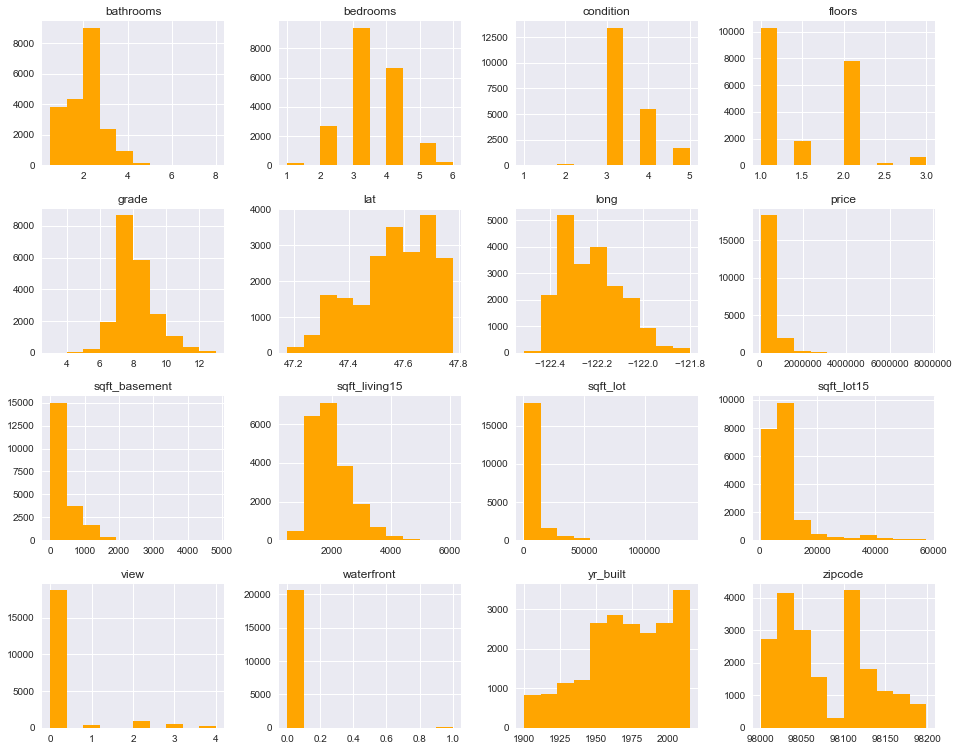

In [31]:
kc_df.hist(figsize = (16,13), color='orange');

# MODELING data 

In [32]:
kc_df.describe().round()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,20683.0,20683.0,20683.0,20683.0,20683.0,20683.0,20683.0,20683.0,20683.0,20683.0,20683.0,20683.0,20683.0,20683.0,20683.0,20683.0
mean,537565.0,3.0,2.0,9928.0,1.0,0.0,0.0,3.0,8.0,286.0,1971.0,98079.0,48.0,-122.0,1974.0,9019.0
std,366189.0,1.0,1.0,10791.0,1.0,0.0,1.0,1.0,1.0,436.0,30.0,54.0,0.0,0.0,677.0,7660.0
min,78000.0,1.0,0.0,520.0,1.0,0.0,0.0,1.0,3.0,0.0,1900.0,98001.0,47.0,-123.0,460.0,651.0
25%,320000.0,3.0,2.0,5000.0,1.0,0.0,0.0,3.0,7.0,0.0,1951.0,98033.0,47.0,-122.0,1480.0,5036.0
50%,450000.0,3.0,2.0,7482.0,2.0,0.0,0.0,3.0,7.0,0.0,1974.0,98072.0,48.0,-122.0,1830.0,7500.0
75%,640000.0,4.0,2.0,10154.0,2.0,0.0,0.0,4.0,8.0,550.0,1997.0,98118.0,48.0,-122.0,2340.0,9750.0
max,7700000.0,6.0,8.0,137214.0,3.0,1.0,4.0,5.0,13.0,4820.0,2015.0,98199.0,48.0,-122.0,6110.0,57500.0


In [33]:
formula = 'price~ bedrooms+bathrooms+sqft_lot+floors+C(zipcode)+C(grade)+C(waterfront)+sqft_basement'
#start off with a lot of columns - delete high pvalues and run model again.

In [34]:
model = smf.ols(formula=formula,data=kc_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     895.0
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:03:50   Log-Likelihood:            -2.7833e+05
No. Observations:               20683   AIC:                         5.568e+05
Df Residuals:                   20597   BIC:                         5.575e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.395e+05    1.7e+05      0.820      0.412   -1.94e+05    4.73e+05
C(zipcode)[T.98002]  2.374e+04   1.51e+04      1.577      0.115   -5771.133    5.33e+04
C(zipcode)[T.98003] -3240.7575   1.36e+04     -0.239      0.811   -2.98e+04    2.33e+04
C(zipcode)[T.98004]   7.91e+05   1.33e+04     59.588      0.000    7.65e+05    8.17e+05
C(zipcode)[T.98005]  3.029e+05    1.6e+04     18.923      0.000    2.72e+05    3.34e+05
C(zipcode)[T.98006]  2.723e+05    1.2e+04     22.749      0.000    2.49e+05    2.96e+05
C(zipcode)[T.98007]   2.44e+05    1.7e+04     14.335      0.000    2.11e+05    2.77e+05
C(zipcode)[T.98008]  2.783e+05   1.36e+04     20.514      0.000    2.52e+05    3.05e+05
C(zipcode)[T.98010]  8.736e+04   2.13e+04      4.097      0.000    4.56e+04    1.29e+05
C(zipcode)[T.98011]  1.454e+05   1.51e+04      9.606      0.000    1.16e+05    1.75e+05
C(zipcode)[T.98014]  1.091e+05   2.24e+04      4.881      0.000    6.53e+04    1.53e+05
C(zipcode)[T.98019]  1.079e+05   1.61e+04      6.685      0.000    7.63e+04     1.4e+05
C(zipcode)[T.98022]  2.807e+04   1.56e+04      1.804      0.071   -2420.269    5.86e+04
C(zipcode)[T.98023] -3.024e+04   1.18e+04     -2.564      0.010   -5.34e+04   -7119.757
C(zipcode)[T.98024]  1.307e+05   2.74e+04      4.770      0.000     7.7e+04    1.84e+05
C(zipcode)[T.98027]  1.607e+05   1.28e+04     12.528      0.000    1.36e+05    1.86e+05
C(zipcode)[T.98028]  1.398e+05   1.35e+04     10.359      0.000    1.13e+05    1.66e+05
C(zipcode)[T.98029]  2.064e+05   1.32e+04     15.636      0.000    1.81e+05    2.32e+05
C(zipcode)[T.98030]  7352.8939   1.39e+04      0.527      0.598      -2e+04    3.47e+04
C(zipcode)[T.98031]  1.299e+04   1.37e+04      0.951      0.342   -1.38e+04    3.98e+04
C(zipcode)[T.98032]  5044.9819   1.76e+04      0.286      0.775   -2.95e+04    3.96e+04
C(zipcode)[T.98033]  3.774e+05   1.22e+04     30.970      0.000    3.53e+05    4.01e+05
C(zipcode)[T.98034]  1.985e+05   1.16e+04     17.145      0.000    1.76e+05    2.21e+05
C(zipcode)[T.98038]  4.312e+04   1.16e+04      3.701      0.000    2.03e+04    6.59e+04
C(zipcode)[T.98039]  1.281e+06   2.61e+04     49.104      0.000    1.23e+06    1.33e+06
C(zipcode)[T.98040]  5.459e+05   1.37e+04     39.710      0.000    5.19e+05    5.73e+05
C(zipcode)[T.98042]  1.244e+04   1.16e+04      1.070      0.285   -1.04e+04    3.52e+04
C(zipcode)[T.98045]  1.205e+05   8.52e+04      1.414      0.157   -4.65e+04    2.87e+05
C(zipcode)[T.98052]  2.388e+05   1.15e+04     20.771      0.000    2.16e+05    2.61e+05
C(zipcode)[T.98053]   2.53e+05   1.29e+04     19.657      0.000    2.28e+05    2.78e+05
C(zipcode)[T.98055]  4.854e+04   1.37e+04      3.533      0.000    2.16e+04    7.55e+04
C(zipcode)[T.98056]   1.16e+05   1.24e+04      9.392      0.000    9.18e+04     1.4e+05
C(z

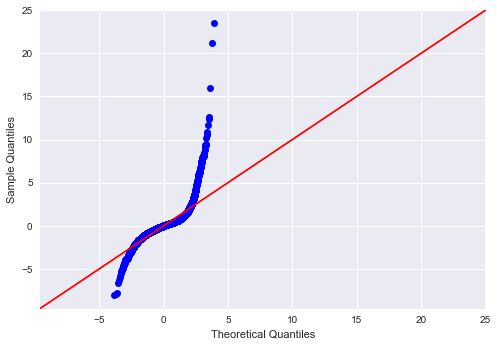

In [35]:
resids = model.resid
sm.graphics.qqplot(resids, stats.norm, line='45', fit=True);

# Interpreting Data

Model 1 created an R-squared value of .783 indicating a high positive correlation of the listed independent variables with price. (bedrooms, bathrooms, sqft_lot, floors, zipcode, grade, waterfront, sqft_basement). There are a couple high p-values within the zipcode and grade cateogory but they have more of a positive input to the model than negative. Therefore, leaving those columns in the model formula. As we see there are still quite a few outliers within our data from our qqplot shown above. We will then compare model 1 to model 2 below. Created with our transformed dataset in z-score.

### Z-Scoring

In [36]:
num_cols = kc_df.drop(['price','zipcode','waterfront','view','condition','grade','yr_built','date'], axis=1).columns
num_cols
#drop the cateogrical columns 

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_basement', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [37]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(kc_df[num_cols])

In [38]:
kc_df_scaled = pd.DataFrame(data=scaled_data, columns=num_cols)
kc_df_scaled.describe().round(3)

,bedrooms,bathrooms,sqft_lot,floors,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000
mean,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.694,-2.117,-0.872,-0.911,-0.657,-2.804,-2.257,-2.237,-1.092
25%,-0.413,-0.797,-0.457,-0.911,-0.657,-0.618,-0.839,-0.730,-0.520
50%,-0.413,0.193,-0.227,0.014,-0.657,0.092,-0.141,-0.213,-0.198
75%,0.727,0.524,0.021,0.939,0.606,0.846,0.666,0.540,0.095
max,3.008,7.787,11.796,2.789,10.409,1.560,3.307,6.110,6.329


In [39]:
kc_df_scaled['price'] = kc_df['price']
kc_df_scaled['waterfront'] = kc_df['waterfront']
kc_df_scaled['view'] = kc_df['view']
kc_df_scaled['condition'] = kc_df['condition']
kc_df_scaled['grade'] = kc_df['grade']
kc_df_scaled['date'] = kc_df['date']
kc_df_scaled['yr_built'] = kc_df['yr_built']
kc_df_scaled['zipcode'] = kc_df['zipcode']
#put the categorical and dependent variables back so that when rows are deleted they
#are deleted from all categories. 

In [40]:
kc_df = kc_df_scaled.copy()

In [41]:
print(kc_df.shape)
kc_df = kc_df.loc[np.abs(kc_df['bedrooms']<3)]
kc_df = kc_df.loc[np.abs(kc_df['bathrooms']<3)]
kc_df = kc_df.loc[np.abs(kc_df['sqft_lot']<3)]
kc_df = kc_df.loc[np.abs(kc_df['long']<3)]
kc_df = kc_df.loc[np.abs(kc_df['sqft_living15']<3)]
kc_df = kc_df.loc[np.abs(kc_df['sqft_lot15']<3)]
kc_df = kc_df.loc[np.abs(kc_df['sqft_basement']<3)]
print(kc_df.shape)
#dropping all values below -3 and above 3

(20683, 17)
(19084, 17)


After the data has been z-scored all data points greater than 3 or less than -3 are considered outliers. Therefore I added all the categorical columns back to the dataset and dropped the selected rows. As we can see below all values in our columns are now in between -3 and 3.

In [42]:
kc_df.describe().round(3)

,bedrooms,bathrooms,sqft_lot,floors,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,waterfront,view,condition,grade,yr_built,zipcode
count,19084.000,19084.000,19084.000,19084.000,19084.000,19084.000,19084.000,19084.000,19084.000,18260.000,18260.000,18260.000,18260.000,18260.000,18260.000,18260.000
mean,-0.072,-0.074,-0.181,-0.014,-0.055,-0.006,-0.057,-0.099,-0.184,536356.716,0.007,0.231,3.433,7.620,1969.009,98079.624
std,0.938,0.930,0.474,1.003,0.899,1.001,0.974,0.893,0.538,369454.128,0.081,0.763,0.661,1.157,29.033,54.351
min,-2.694,-2.117,-0.872,-0.911,-0.657,-2.804,-2.257,-2.237,-1.092,78000.000,0.000,0.000,1.000,3.000,1900.000,98001.000
25%,-0.413,-0.797,-0.462,-0.911,-0.657,-0.628,-0.870,-0.760,-0.525,318000.000,0.000,0.000,3.000,7.000,1950.000,98033.000
50%,-0.413,-0.137,-0.250,-0.911,-0.657,0.085,-0.314,-0.275,-0.223,449950.000,0.000,0.000,3.000,7.000,1970.000,98072.000
75%,0.727,0.524,-0.030,0.939,0.514,0.849,0.556,0.422,0.032,640000.000,0.000,0.000,4.000,8.000,1993.000,98118.000
max,1.867,2.835,2.995,2.789,2.993,1.560,2.993,2.993,2.987,7700000.000,1.000,4.000,5.000,13.000,2015.000,98199.000


### QUESTION 3: What is z-scoring doing to the data?
Z-scoring is done to help have a clearer understanding of correlation by putting all the variables into the same scoring system. With the diversity of columns and categories it is impossible to compare one to the other and z-score helps us by transforming the variables into comparable variables. As we see creating a model after transforming the data to z-score dropped our r-squared value but only by a little. 

## MODEL 2: post z-score

In [43]:
formula = 'price~ bathrooms+floors+C(zipcode)+C(grade)+C(waterfront)+sqft_basement'

In [44]:
model = smf.ols(formula=formula,data=kc_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     665.6
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:03:51   Log-Likelihood:            -2.4725e+05
No. Observations:               18260   AIC:                         4.947e+05
Df Residuals:                   18176   BIC:                         4.953e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.359e+05   1.85e+05      1.274      0.203   -1.27e+05    5.99e+05
C(zipcode)[T.98002.0]   1.89e+04   1.77e+04      1.070      0.285   -1.57e+04    5.35e+04
C(zipcode)[T.98003.0] -1.527e+04   1.57e+04     -0.974      0.330    -4.6e+04    1.55e+04
C(zipcode)[T.98004.0]  8.009e+05   1.55e+04     51.816      0.000    7.71e+05    8.31e+05
C(zipcode)[T.98005.0]  3.342e+05   1.83e+04     18.262      0.000    2.98e+05     3.7e+05
C(zipcode)[T.98006.0]  2.802e+05   1.39e+04     20.178      0.000    2.53e+05    3.07e+05
C(zipcode)[T.98007.0]   2.36e+05   1.96e+04     12.025      0.000    1.98e+05    2.74e+05
C(zipcode)[T.98008.0]  2.815e+05   1.58e+04     17.865      0.000    2.51e+05    3.12e+05
C(zipcode)[T.98010.0]   1.02e+05   2.51e+04      4.070      0.000    5.29e+04    1.51e+05
C(zipcode)[T.98011.0]  1.426e+05   1.77e+04      8.061      0.000    1.08e+05    1.77e+05
C(zipcode)[T.98014.0]  1.151e+05   2.59e+04      4.435      0.000    6.42e+04    1.66e+05
C(zipcode)[T.98019.0]  1.085e+05   1.89e+04      5.727      0.000    7.14e+04    1.46e+05
C(zipcode)[T.98022.0]  1.856e+04   1.79e+04      1.036      0.300   -1.66e+04    5.37e+04
C(zipcode)[T.98023.0] -3.689e+04   1.38e+04     -2.682      0.007   -6.39e+04   -9925.958
C(zipcode)[T.98024.0]  1.478e+05    3.1e+04      4.760      0.000    8.69e+04    2.09e+05
C(zipcode)[T.98027.0]  1.792e+05   1.54e+04     11.658      0.000    1.49e+05    2.09e+05
C(zipcode)[T.98028.0]  1.438e+05   1.57e+04      9.178      0.000    1.13e+05    1.75e+05
C(zipcode)[T.98029.0]  1.699e+05   1.54e+04     11.044      0.000     1.4e+05       2e+05
C(zipcode)[T.98030.0]  6009.0702   1.64e+04      0.365      0.715   -2.62e+04    3.82e+04
C(zipcode)[T.98031.0]  1.387e+04   1.58e+04      0.878      0.380   -1.71e+04    4.48e+04
C(zipcode)[T.98032.0] -1.274e+04   2.03e+04     -0.629      0.530   -5.25e+04     2.7e+04
C(zipcode)[T.98033.0]  3.799e+05   1.43e+04     26.485      0.000    3.52e+05    4.08e+05
C(zipcode)[T.98034.0]  1.923e+05   1.35e+04     14.236      0.000    1.66e+05    2.19e+05
C(zipcode)[T.98038.0]  3.501e+04   1.37e+04      2.554      0.011    8141.877    6.19e+04
C(zipcode)[T.98039.0]  1.327e+06   3.01e+04     44.134      0.000    1.27e+06    1.39e+06
C(zipcode)[T.98040.0]  5.617e+05   1.59e+04     35.439      0.000    5.31e+05    5.93e+05
C(zipcode)[T.98042.0]  2637.6766   1.36e+04      0.194      0.846    -2.4e+04    2.93e+04
C(zipcode)[T.98045.0]  1.239e+05   9.28e+04      1.336      0.182   -5.79e+04    3.06e+05
C(zipcode)[T.98052.0]  2.223e+05   1.35e+04     16.490      0.000    1.96e+05    2.49e+05
C(zipcode)[T.98053.0]  2.282e+05   1.51e+04     15.104      0.000    1.99e+05    2.58e+05
C(zipcode)[T.98055.0]  3.964e+04    1.6e+04      2.480      0.013    8309.346     7.1e+04
C(zipcode)[T.98056.0]  

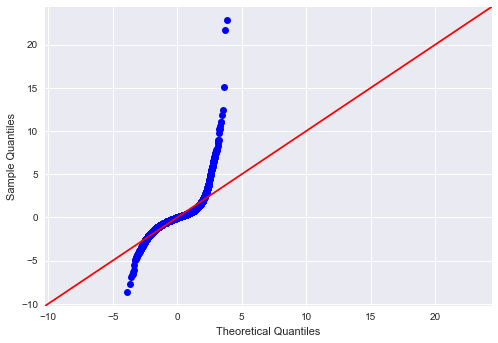

In [45]:
resids = model.resid
sm.graphics.qqplot(resids, stats.norm, line='45', fit=True);

 As we can see there is not a big difference in our r-squared value between our first and second model. It did decrease slightly but overall, the variables are practically the same.

# CONCLUSION and RECOMMENDATIONS

Since model 1 was able to give us a lower kurtosis and skew resulting in a more accurate model, with an r-squared value of 0.787, the following recommendations have been gathered.

To increase the value of your home in King County it is suggested to add more bathrooms and bedrooms while using higher quality grade material. The biggest return value will come from the number of bathrooms in the home. For every bathroom added the value of the house increases by $69,170,000. 
    
    - bathrooms 6.917e+04 ($69,170,000)
    
    - bedrooms 2.592e+04 ($25,920,000)	
    
    - higher quality grade material used, larger the return value.

Otherwise the main factor to house prices in King County is based on the location (zipcode) of the home. 